# Big Mac Price Analysis



In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_multiple_lines(df, x, y, group, xlabel, ylabel):
    color_dict = {
    'maroon': '#800000', 	
    'crimson': '#DC143C',
    'salmon' : '#FA8072',
    'dark orange' : '#FF8C00',
    'gold' : '#FFD700',
    'dark khaki' : '#BDB76B',
    'light green' : '#90EE90',
    'medium aqua marine': '#66CDAA',
    'corn flower blue': '#6495ED',
    'dodger blue': '#1E90FF'
    }

    fig, ax = plt.subplots(figsize=(18, 6))
    ax.set_prop_cycle(color=[x for x in color_dict.values()])

    df.set_index(x, inplace=True)
    plot = df.groupby(group)[y].plot(legend=True, xlabel=xlabel, ylabel=ylabel, marker='o', linewidth=2.5)
    plt.legend(edgecolor='black')

    return plot
    

bigmac = pd.read_csv("./BigmacPrice.csv")

# Print information about the dataset 
print(bigmac.shape)
print(bigmac.columns)

(1946, 6)
Index(['date', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price'],
      dtype='object')


The Big Mac dataset consists of **1946** rows and **6** columns. These are: *date*, *currency_code*, *name*, *local_price*, *dollar_ex* and *dollar_price*. According to the author's description available on Kaggle, *dollar_ex* is the US dollar conversion rate, namely:

$$ \frac{\text{local price}}{\text{dollar ex}} = \text{dollar price} $$

Let start by doing some *explarotory data analysys* (EDA). The dataset contains a *date* column, so we should first check the extent of data in time:

In [118]:
# Check number of distinct date
distinct_date = bigmac["date"].nunique()
print(f"The number of distinct date in the date column is: {distinct_date}")

# Find min and max date:
min_date = bigmac["date"].min()
max_date = bigmac["date"].max()
print(f"Minimum date: {min_date}    Maximum date: {max_date}")

The number of distinct date in the date column is: 37
Minimum date: 2000-04-01    Maximum date: 2022-07-01


There are 37 distinct date, ranging from 2000-04-01 to 2022-07-01. We may not have the same data for each country at the same date. To check it, let first briefly analyze the number of distinct countries available in the dataset:

In [119]:
# Check number of distinct country
distinct_country = bigmac["name"].nunique()
print(f"The number of distinct countries in the date column is: {distinct_country}")

The number of distinct countries in the date column is: 74


Since $74\times 37 = 2738 > 1946$, it trivially follows that for some countries we have less than 37 data point. To better understand the collected data, we may plot the dollar price vs date, using different colors for each country. Let generate two different line plots: one visualizing the top 10 countries with more data points in time and one for countries with the least number of data in time.

name
Croatia      AxesSubplot(0.125,0.125;0.775x0.755)
Honduras     AxesSubplot(0.125,0.125;0.775x0.755)
Jordan       AxesSubplot(0.125,0.125;0.775x0.755)
Kuwait       AxesSubplot(0.125,0.125;0.775x0.755)
Latvia       AxesSubplot(0.125,0.125;0.775x0.755)
Lebanon      AxesSubplot(0.125,0.125;0.775x0.755)
Moldova      AxesSubplot(0.125,0.125;0.775x0.755)
Nicaragua    AxesSubplot(0.125,0.125;0.775x0.755)
Oman         AxesSubplot(0.125,0.125;0.775x0.755)
Romania      AxesSubplot(0.125,0.125;0.775x0.755)
Name: dollar_price, dtype: object

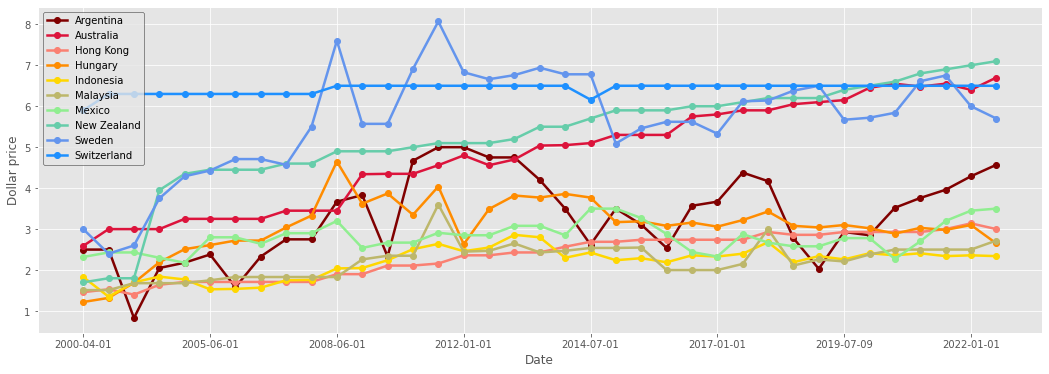

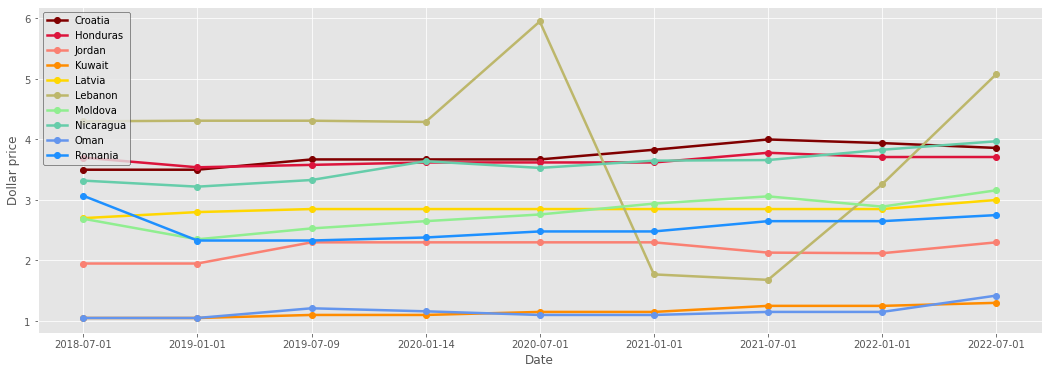

In [120]:

country_ndate = bigmac.groupby("name")["date"].nunique()

top10_country_ndate = country_ndate.sort_values(ascending=False).head(10).to_frame().reset_index()
bigmac_top10_country_ndate = bigmac[bigmac["name"].isin(top10_country_ndate["name"])]

bottom10_country_ndate = country_ndate.sort_values(ascending=True).head(10).to_frame().reset_index()
bigmac_bottom10_country_ndate = bigmac[bigmac["name"].isin(bottom10_country_ndate["name"])]

plot_multiple_lines(bigmac_top10_country_ndate, "date", "dollar_price", "name", "Date", "Dollar price")
plot_multiple_lines(bigmac_bottom10_country_ndate, "date","dollar_price", "name", "Date", "Dollar price")